In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import pickle


In [ ]:
df=pd.read_csv("/content/personality_datasert.csv")
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,3.0,Yes,2.0,0.0,Introvert


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


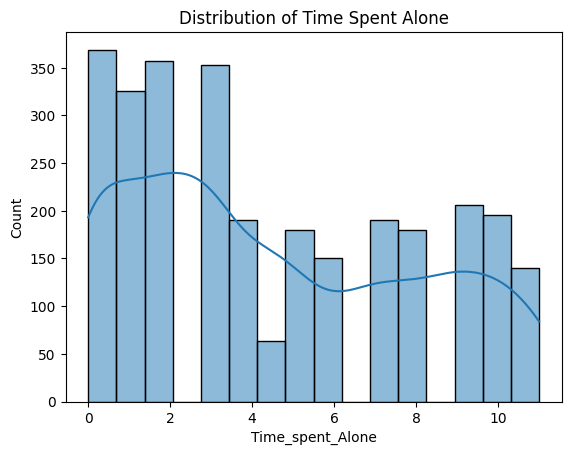

In [ ]:
sns.histplot(df['Time_spent_Alone'], kde=True)
plt.title('Distribution of Time Spent Alone')
plt.show()

In [ ]:
stage_fear_counts = df['Stage_fear'].value_counts()
total_samples = len(df)

percentage_yes = (stage_fear_counts['Yes'] / total_samples) * 100
print(f"Percentage with Stage Fear: {percentage_yes:.2f}%")


Percentage with Stage Fear: 48.62%


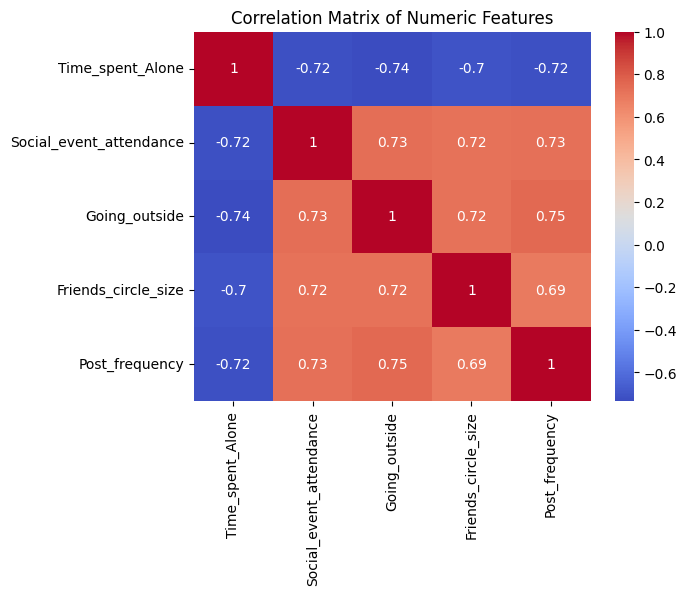

In [ ]:
import numpy as np
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

Time_spent_Alone" is strongly negatively correlated with "Social_event_attendance" (-0.72), "Going_outside" (-0.74), "Friends_circle_size" (-0.70), and "Post_frequency" (-0.72).

Features like "Going_outside," "Friends_circle_size," and "Post_frequency" are all positively correlated with one another (values between 0.69 and 0.75).

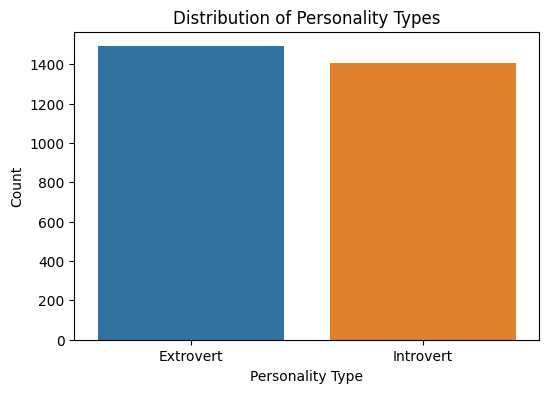

In [ ]:
# --- 2️⃣ Personality Distribution ---
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Personality', hue='Personality', legend=False)
plt.title("Distribution of Personality Types")
plt.xlabel("Personality Type")
plt.ylabel("Count")
plt.show()

In [ ]:
for col in ['Personality','Stage_fear', 'Drained_after_socializing']:
    df[col] = LabelEncoder().fit_transform(df[col])

In [ ]:
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,0
1,9.0,1,0.0,0.0,1,0.0,3.0,1
2,9.0,1,1.0,2.0,1,5.0,2.0,1
3,0.0,0,6.0,7.0,0,14.0,8.0,0
4,3.0,0,9.0,4.0,0,8.0,5.0,0
...,...,...,...,...,...,...,...,...
2895,3.0,0,7.0,6.0,0,6.0,6.0,0
2896,3.0,0,8.0,3.0,0,14.0,9.0,0
2897,4.0,1,1.0,1.0,1,4.0,0.0,1
2898,11.0,1,1.0,3.0,1,2.0,0.0,1


In [ ]:
# Split features and target
X = df.drop('Personality', axis=1)
y = df['Personality']

In [ ]:
# train test Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       302
           1       0.91      0.93      0.92       278

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



In [ ]:
params = {
    'n_estimators': [100, 200],           # Number of trees in the forest
    'criterion': ["gini", "entropy"],     # Split quality function
    'min_samples_leaf': [1, 2],           # Minimum samples required at a leaf node
    'bootstrap': [True, False]            # Sampling method (with or without replacement)
}
grid_search = GridSearchCV(RandomForestClassifier(), params, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'min_samples_leaf': 2,
 'n_estimators': 200}

In [ ]:
rf1=RandomForestClassifier(bootstrap=True,criterion='gini',min_samples_leaf=2,n_estimators=200)
rf1.fit(X_train,y_train)
y_pred=rf1.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9293103448275862
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       302
           1       0.92      0.94      0.93       278

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580



In [ ]:
pickle.dump(rf1,open('model_personality.pkl','wb'))

